In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#导入数据及合并
#该数据集包括多个国家的数据，将这些数据导入，添加一列属性：country，之后再合并
data_us = pd.read_csv('youtube-new/USvideos.csv')
data_us['country'] = 'USA'
data_gb = pd.read_csv('youtube-new/GBvideos.csv')
data_gb['country'] = ' Great Britain'
data_de = pd.read_csv('youtube-new/DEvideos.csv')
data_de['country'] = 'Germany'
data_ca = pd.read_csv('youtube-new/CAvideos.csv')
data_ca['country'] = 'Canada'
data_fr = pd.read_csv('youtube-new/FRvideos.csv')
data_fr['country'] = 'France'
data = pd.concat([data_us,data_gb,data_de,data_ca,data_fr])
print('数据行数:'+str(data.shape[0]))
print('数据列数:'+str(data.shape[1]))
print("每个变量数据类型:")
print(data.dtypes)
print("数据前五行:")
data.head()

数据行数:202310
数据列数:17
每个变量数据类型:
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object
数据前五行:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,USA


In [8]:
##数据摘要
##标称属性：country;channel_title;category_id;
features_n = ['country','channel_title','category_id']
print('标称属性有：'+str(features_n))
print('(每种属性展示其频数最高前十个取值)')
for fea in features_n: 
    fea_value = data[fea].value_counts()
    print(fea+": 共有"+str(len(fea_value))+"种取值")
    print(""+str(fea_value[0:10]))

标称属性有：['country', 'channel_title', 'category_id']
(每种属性展示其频数最高前十个取值)
country: 共有5种取值
USA               40949
Canada            40881
Germany           40840
France            40724
 Great Britain    38916
Name: country, dtype: int64
channel_title: 共有16659种取值
The Late Show with Stephen Colbert        779
Late Night with Seth Meyers               692
TheEllenShow                              659
The Tonight Show Starring Jimmy Fallon    648
Jimmy Kimmel Live                         632
WWE                                       631
CNN                                       557
The Late Late Show with James Corden      551
Netflix                                   503
FBE                                       491
Name: channel_title, dtype: int64
category_id: 共有18种取值
24    57650
10    30275
22    21948
23    15935
25    14558
17    13962
26    12187
1     11515
20     6973
28     5682
Name: category_id, dtype: int64


In [10]:
##数值属性：views;likes;dislikes;comment_count
features = ['views','likes','dislikes','comment_count']
print('数值属性有：'+str(features))
for fea in features: 
    fea_np = np.array(data[fea].dropna(axis=0))
    Minimum=min(fea_np)
    Maximum=max(fea_np)
    Q1=np.percentile(fea_np,25)
    Median=np.median(fea_np)
    Q3=np.percentile(fea_np,75)
    null=data[fea].isnull().sum()
    print(fea+"五数概括：最小值：{}，第一四分位数：{}，中位数：{}，第三四分位数：{}，最大值{}, 空值个数{}".format(Minimum,Q1,Median,Q3,Maximum,null))

数值属性有：['views', 'likes', 'dislikes', 'comment_count']
views五数概括：最小值：223，第一四分位数：75174.25，中位数：309129.0，第三四分位数：1103690.5，最大值424538912, 空值个数0
likes五数概括：最小值：0，第一四分位数：1447.0，中位数：7603.0，第三四分位数：32244.75，最大值5613827, 空值个数0
dislikes五数概括：最小值：0，第一四分位数：67.0，中位数：290.0，第三四分位数：1152.0，最大值1944971, 空值个数0
comment_count五数概括：最小值：0，第一四分位数：209.0，中位数：924.0，第三四分位数：3520.0，最大值1626501, 空值个数0


<BarContainer object of 18 artists>

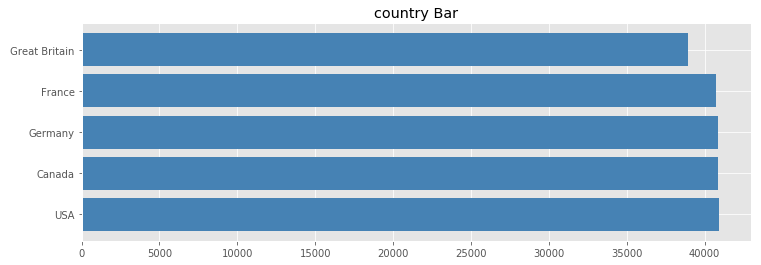

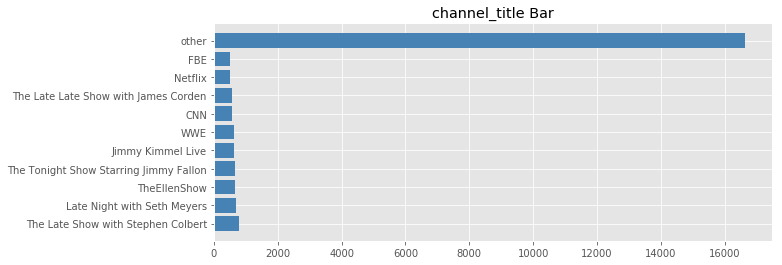

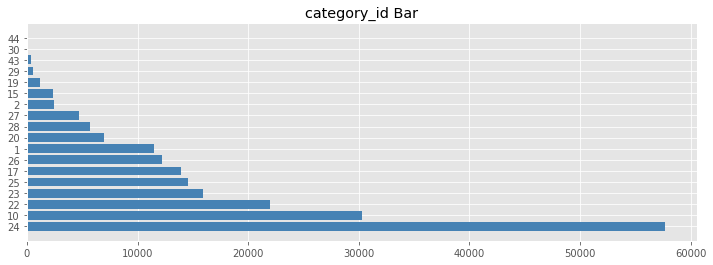

In [11]:
#绘制条形图
#country
plt.figure(figsize=(12,4))
plt.style.use('ggplot')
fea_c = data['country'].value_counts()
plt.title('country Bar')
show = dict(fea_c)
plt.barh(y = range(len(show)), width = list(show.values()), 
    tick_label = list(show.keys()), color = 'steelblue', height = 0.8)
#channel_id
plt.figure(figsize=(10,4))
fea_c = data['channel_title'].value_counts()
count = 0
sum = 0
show = {}
for it in fea_c.index:
    count += 1
    if count <= 10:
        show[it] = fea_c[it]
    else:
        sum += 1
show['other'] = sum
plt.title('channel_title'+' Bar')
plt.barh(y = range(11),width=list(show.values()), 
        tick_label = list(show.keys()), color = 'steelblue',height = 0.8 )
#category_id
plt.figure(figsize=(12,4))
plt.style.use('ggplot')
fea_c = data['category_id'].value_counts()
plt.title('category_id Bar')
show = dict(fea_c)
plt.barh(y = range(len(show)), width = list(show.values()), 
    tick_label = list(show.keys()), color = 'steelblue', height = 0.8)

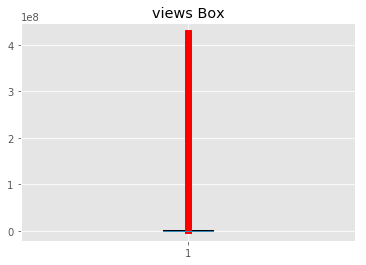

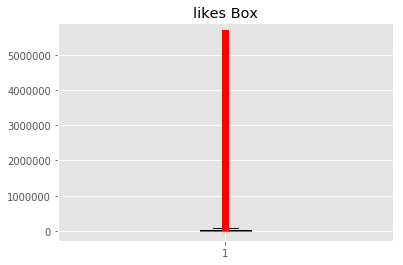

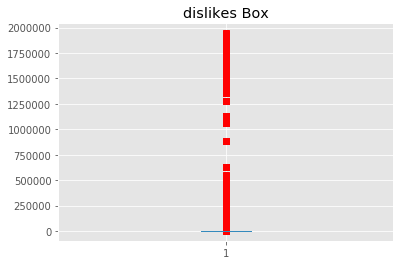

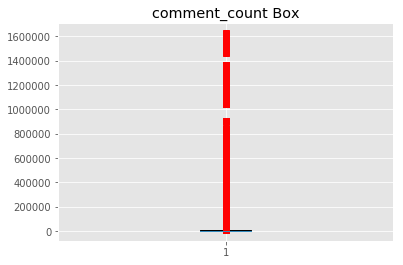

In [12]:
##数据可视化
for fea in features: 
    fig = plt.figure(figsize=(6,4))
    plt.boxplot(np.array(data[fea].dropna(axis=0)),
                notch=False, # box instead of notch shape
                sym='rs',    # red squares for outliers
                vert=True)   # vertical box aligmnent
    plt.title(fea+' Box')
    plt.show()

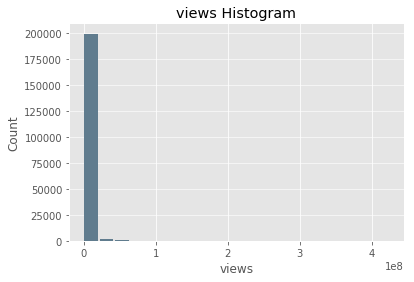

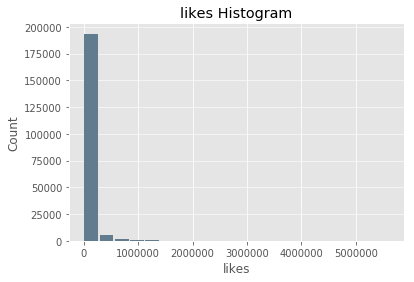

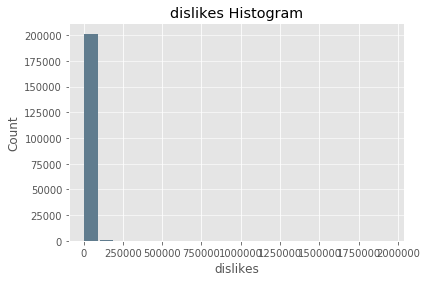

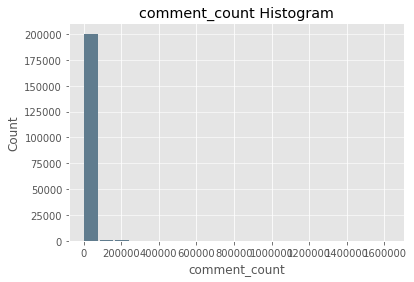

In [13]:
for fea in features: 
    fig = plt.figure(figsize=(6,4))
    tmp = data[fea].dropna(axis=0)
    tmp.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
    plt.title(fea+' Histogram')
    plt.xlabel(fea)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)

In [14]:
##查看有缺失值的特征
##只有description有缺失值，为视频描述，不需填补
data.isnull().any()  

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
country                   False
dtype: bool